In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
from matplotlib import pyplot as plt
import scipy as scipy
import plotly.express as px
from matplotlib.backends.backend_pdf import PdfPages
import math
from scipy import stats

In [ ]:
drive.mount('/content/drive')

w_wine = pd.read_csv('drive/My Drive/ICA/winequality-white.csv', sep = ';')
r_wine = pd.read_csv('drive/My Drive/ICA/winequality-red.csv', sep = ';')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. Considerações iniciais sobre as variáveis

In [ ]:
w_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
r_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


##1.1 Remoção de outliers (vinho branco)

In [ ]:
def plot_boxplot(df, ft):
  df.boxplot(column = [ft])
  plt.grid(False)
  plt.show()
def outliers(df, ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  I = Q3 - Q1
  LwLimit = Q1 - 1.5*I
  UpLimit = Q3 + 1.5*I
  ls = df.index[(df[ft] < LwLimit) | (df[ft] > UpLimit)]
  return ls
def remove(df, ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df

In [ ]:
remover = []
for i in w_wine:
  if(i!='quality'):
    remover.extend(outliers(w_wine, i))
w_wine_cleaned = remove(w_wine, remover)
w_wine_cleaned.shape

(4015, 12)

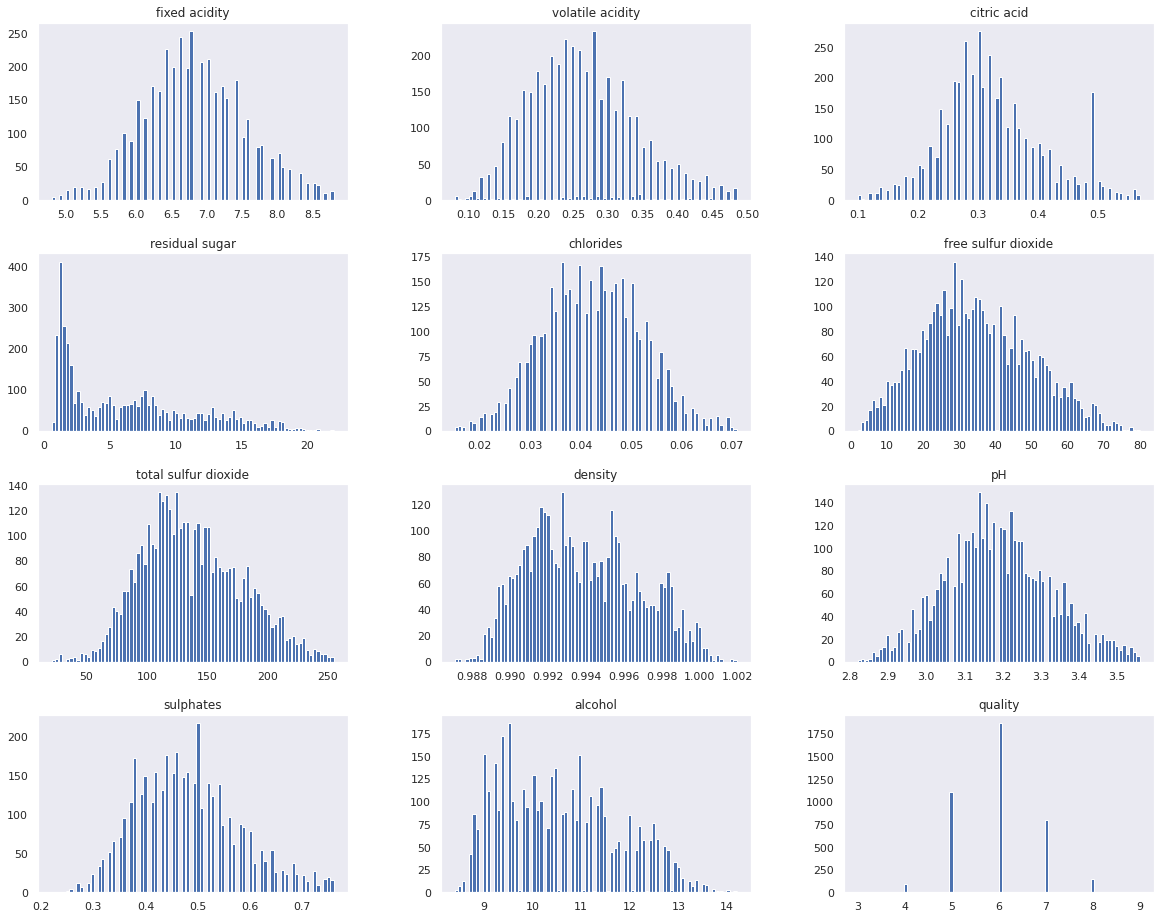

In [ ]:
w_wine_cleaned.hist(
    figsize=(20, 16),
    grid = False,
    rwidth = 0.9,
    bins = 80
)
#plt.savefig('inconditional_white.png')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

X = w_wine_cleaned.iloc[:, 0:11]
y = w_wine_cleaned.iloc[:, -1]
column_name = w_wine_cleaned.drop(columns=['quality']).columns

# In general, it's a good idea to scale the data prior to PCA.
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    
pca = PCA()
x_new = pca.fit_transform(X)

def myplot(pcs,loadings, target, column_name, labels=None):
    xs = pcs[:,0]
    ys = pcs[:,1]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    pc1 = xs*scalex
    pc2 = ys*scaley

    df = {'pc1': pc1, 'pc2': pc2, 'quality': target}
    df = pd.DataFrame(data=df)

    fig = px.scatter(df, x='pc1', y='pc2', color='quality', color_continuous_scale = "rainbow")

    for i, feature in enumerate(column_name):
        fig.add_shape(type='line',
                      x0=0,
                      y0=0,
                      x1=loadings[i,0],
                      y1=loadings[i,1]
                    )
        fig.add_annotation(x=loadings[i,0],
                           y=loadings[i,1],
                           ax=0,
                           ay=0,
                           xanchor="center",
                           yanchor="bottom",
                           text = feature,
                           font=dict(size=18,
                                     color="crimson"
                                    )
                          )
    fig.show()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]), y, column_name)


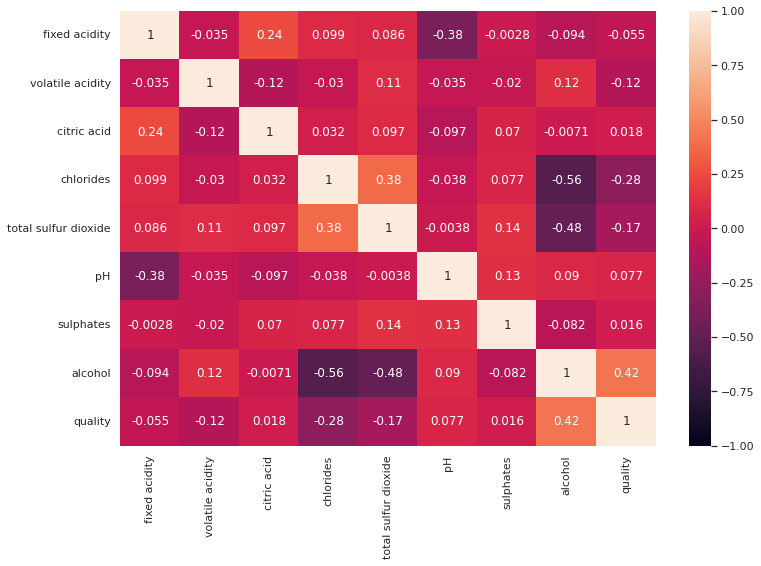

In [ ]:
w_wine_cleaned.drop(columns=["free sulfur dioxide", "residual sugar", "density"], inplace = True)
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(w_wine_cleaned.corr(), annot=True, vmin=-1, vmax=1)

#ANN vinho branco

## Part 1 - Data Preprocessing

In [ ]:
import tensorflow as tf

### Importing the dataset

In [ ]:
dataset = w_wine_cleaned
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

### Encoding categorical data

One Hot Encoding the "Category" column

### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

In [ ]:
# ann = tf.keras.Sequential()
# ann.add(tf.keras.layers.Dense(units=8, activation='relu', input_dim = 8))
# ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
# ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
# ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
# ann.add(tf.keras.layers.Dense(units=1, activation='linear'))
# ann.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])
# ann.fit(X_train, y_train, batch_size = 50, epochs = 1000)


In [ ]:
def criar_ann():
  ann = tf.keras.Sequential()
  ann.add(tf.keras.layers.Dense(units=8, activation='relu', input_dim = 8))
  ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
  ann.add(tf.keras.layers.Dense(units=1, activation='linear'))
  ann.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])
  return ann

## Part 3 - Training the ANN

In [ ]:
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
regressor = KerasRegressor(build_fn = criar_ann, epochs = 300, batch_size = 50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



In [ ]:
resultados = cross_val_score(estimator = regressor, X = X_test, y = y_test, cv = 10, scoring = "neg_mean_squared_error")
media = resultados.mean()
desvio = resultados.std()

A saída de streaming foi truncada nas últimas 5000 linhas.
19/19 [==============================] - 0s 2ms/step - loss: 0.5008 - mse: 0.5008
Epoch 202/300
19/19 [==============================] - 0s 2ms/step - loss: 0.5009 - mse: 0.5009
Epoch 203/300
19/19 [==============================] - 0s 2ms/step - loss: 0.5022 - mse: 0.5022
Epoch 204/300
19/19 [==============================] - 0s 2ms/step - loss: 0.4989 - mse: 0.4989
Epoch 205/300
19/19 [==============================] - 0s 2ms/step - loss: 0.4993 - mse: 0.4993
Epoch 206/300
19/19 [==============================] - 0s 2ms/step - loss: 0.4988 - mse: 0.4988
Epoch 207/300
19/19 [==============================] - 0s 2ms/step - loss: 0.4981 - mse: 0.4981
Epoch 208/300
19/19 [==============================] - 0s 2ms/step - loss: 0.4990 - mse: 0.4990
Epoch 209/300
19/19 [==============================] - 0s 2ms/step - loss: 0.4980 - mse: 0.4980
Epoch 210/300
19/19 [==============================] - 0s 2ms/step - loss: 0.4982 - mse: 0.

In [ ]:
print(media)
print('-------------------')
print(desvio)

-0.5524536564387612
-------------------
0.09622119535660549


In [ ]:
print(resultados)

[-0.54406332 -0.43441891 -0.46776434 -0.64894915 -0.52089851 -0.5517246
 -0.73864422 -0.46892895 -0.47844504 -0.67069953]


#1.2 Remoção de outliers (vinho tinto)

In [ ]:
remover = []
for i in r_wine:
  if(i!='quality'):
    remover.extend(outliers(r_wine, i))
r_wine_cleaned = remove(r_wine, remover)
r_wine_cleaned.shape

(1194, 12)

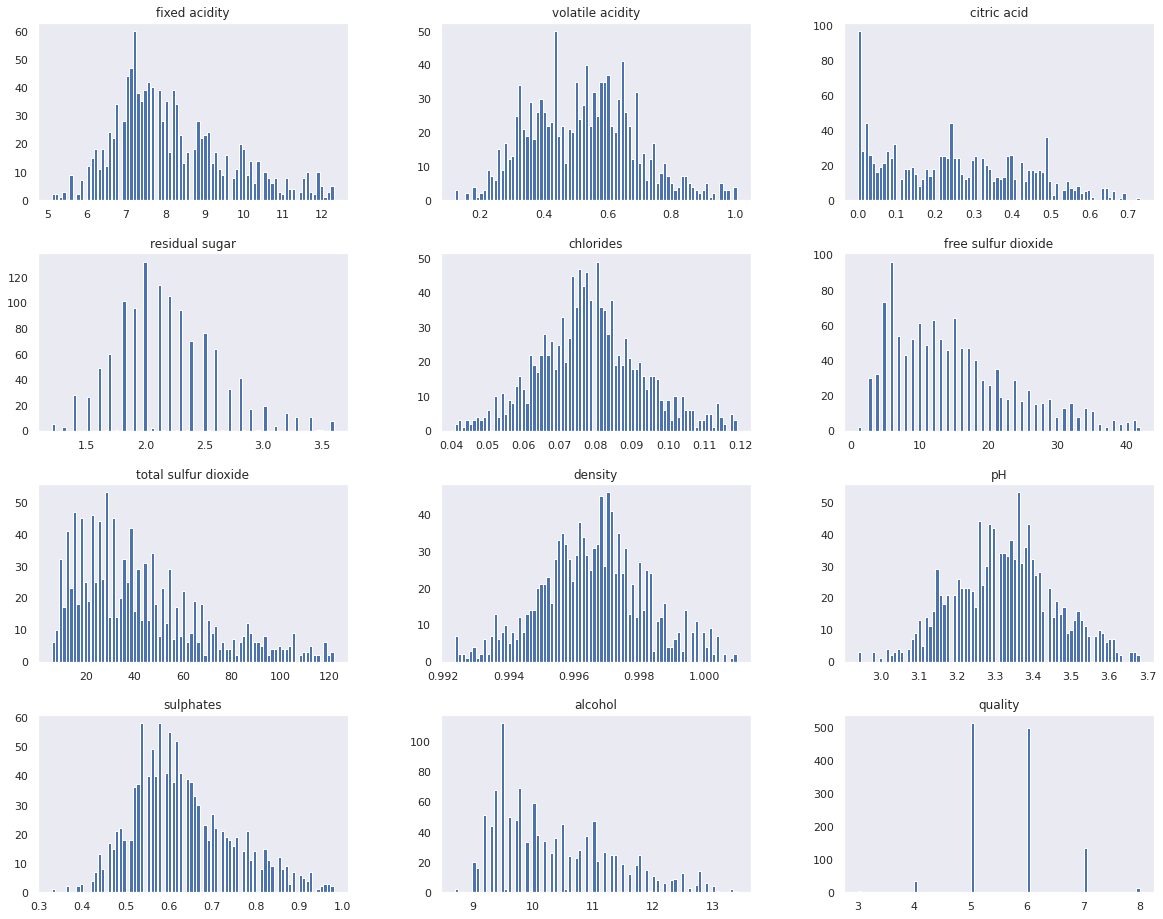

In [ ]:
r_wine_cleaned.hist(
    figsize=(20, 16),
    grid = False,
    rwidth = 0.9,
    bins = 80
)
#plt.savefig('inconditional_white.png')
plt.show()

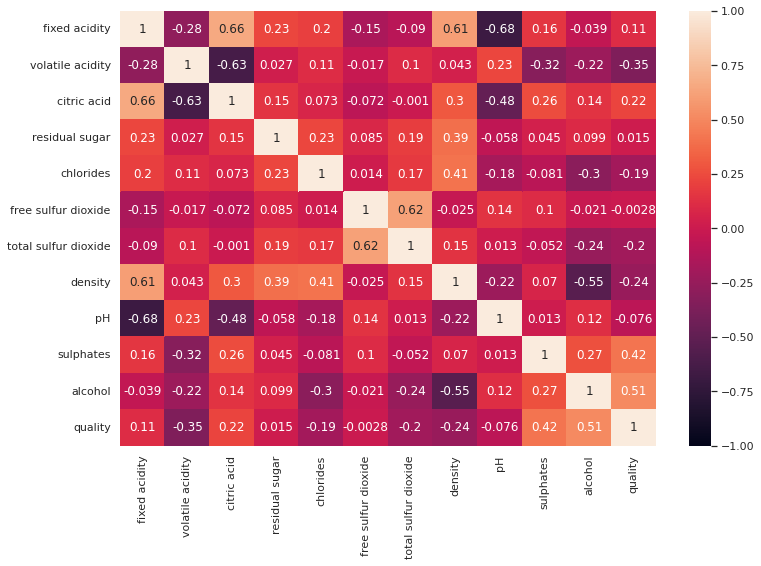

In [ ]:
# r_wine_cleaned.drop(columns=["free sulfur dioxide", "fixed acidity", "volatile acidity"], inplace = True)
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(r_wine_cleaned.corr(), annot=True, vmin=-1, vmax=1)